TensorFlow version: 2.20.0

Loaded Country-data.csv successfully!
Shape: (167, 10)
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  

MNIST shapes:
x_train: (60000, 28, 28) y_train: (60000,)
x_test : (10000, 28, 28) y_test : (10000,)


C:\Users\saiku\anaconda3\envs\vanet_py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 - 77s - 92ms/step - accuracy: 0.9485 - loss: 0.1706 - val_accuracy: 0.9832 - val_loss: 0.0638
Epoch 2/5
844/844 - 99s - 118ms/step - accuracy: 0.9837 - loss: 0.0509 - val_accuracy: 0.9893 - val_loss: 0.0458
Epoch 3/5
844/844 - 126s - 149ms/step - accuracy: 0.9891 - loss: 0.0347 - val_accuracy: 0.9882 - val_loss: 0.0416
Epoch 4/5
844/844 - 67s - 79ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accuracy: 0.9905 - val_loss: 0.0346
Epoch 5/5
844/844 - 78s - 92ms/step - accuracy: 0.9934 - loss: 0.0206 - val_accuracy: 0.9908 - val_loss: 0.0341

Test accuracy: 0.9905, Test loss: 0.0278
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


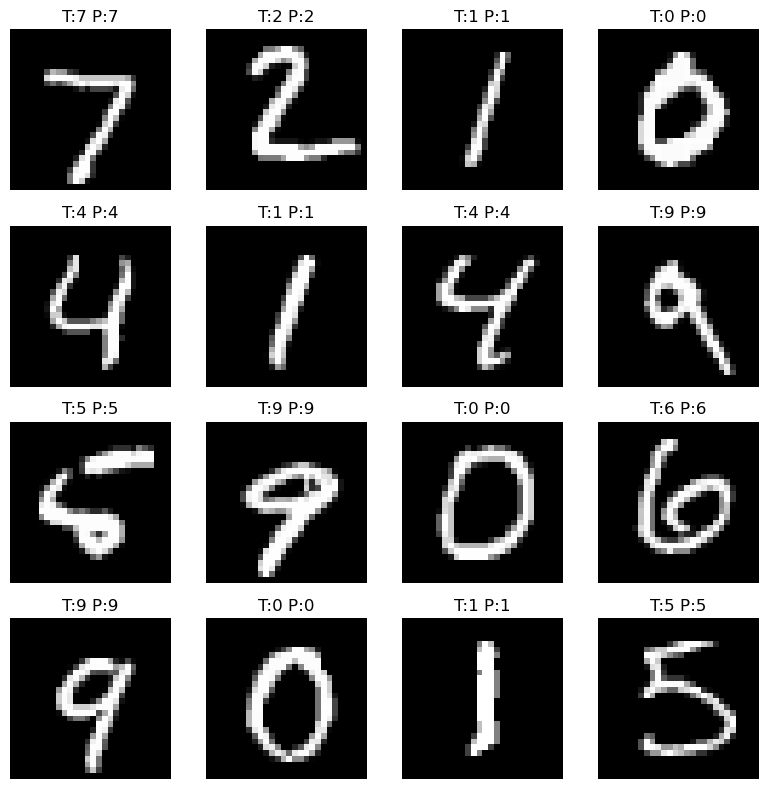

In [3]:
# ONE-CELL NOTEBOOK: Load Country-data.csv + Train CNN on MNIST using TensorFlow

# -----------------------------
# 1. Imports
# -----------------------------
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# -----------------------------
# 2. Load the CSV dataset (Country-data.csv)
# -----------------------------
try:
    country_df = pd.read_csv("Country-data.csv")
    print("\nLoaded Country-data.csv successfully!")
    print("Shape:", country_df.shape)
    print(country_df.head())
except FileNotFoundError:
    print("\nWARNING: Country-data.csv not found in current folder.")

# -----------------------------
# 3. Load MNIST dataset
# -----------------------------
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("\nMNIST shapes:")
print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test :", x_test.shape, "y_test :", y_test.shape)

# -----------------------------
# 4. Preprocess data
# -----------------------------
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# add channel dimension (works for numpy arrays)
x_train = x_train[..., np.newaxis]  # shape: (60000, 28, 28, 1)
x_test  = x_test[..., np.newaxis]   # shape: (10000, 28, 28, 1)

# -----------------------------
# 5. Build CNN model
# -----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes: digits 0–9
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# -----------------------------
# 6. Train the model
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

# -----------------------------
# 7. Evaluate on test data
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# -----------------------------
# 8. Show example predictions
# -----------------------------
pred_probs = model.predict(x_test[:16])
pred_labels = np.argmax(pred_probs, axis=1)

plt.figure(figsize=(8, 8))

for i in range(16):
    plt.subplot(4, 4, i + 1)

    # Robust conversion: x_test is a numpy array here, so .numpy() is not needed.
    # Use squeeze() to remove the channel dimension.
    img = x_test[i].squeeze()          # works for numpy.ndarray
    # If you ever have a tf.Tensor, you can use:
    # if hasattr(x_test[i], "numpy"): img = x_test[i].numpy().squeeze()

    plt.imshow(img, cmap="gray", vmin=0, vmax=1)
    plt.title(f"T:{y_test[i]} P:{pred_labels[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
